In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Model
from keras import backend as K

In [3]:
input_img = Input(shape=(28, 28, 1))

In [4]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [7]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [8]:
from keras.callbacks import TensorBoard

In [9]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.2220 - val_loss: 0.1629
Epoch 2/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.1550 - val_loss: 0.1434
Epoch 3/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.1396 - val_loss: 0.1371
Epoch 4/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.1317 - val_loss: 0.1266
Epoch 5/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1270 - val_loss: 0.1257
Epoch 6/50
60000/60000 [==============================] - 7s 108us/step - loss: 0.1236 - val_loss: 0.1207
Epoch 7/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.1215 - val_loss: 0.1175
Epoch 8/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1196 - val_loss: 0.1156
Epoch 9/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.1182 - val_loss: 0.1

In [11]:
import matplotlib.pyplot as plt

In [10]:
decoded_imgs = autoencoder.predict(x_test)

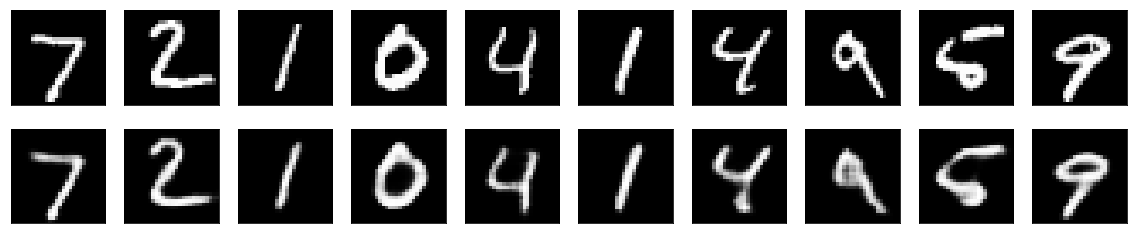

In [16]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()